# Careem case study

This notebook studies Careem App data in order to answer the find out the following data:

* The most common routes

* The percentage of trips that happen at peak hours (morning and evening rush hours)

* The count of loyal customers

#### Getting the data ready

This step is required in order to extract the hour from the pickup_time and dropff_time columns using the below SQL queries

``` SQL
ALTER TABLE Trips ADD COLUMN dropoff_Time_Hour INTEGER;

-- Populate the new column with the hour value from the Pickup_Time column
UPDATE Trips SET dropoff_Time_Hour = SUBSTR(dropoff_Time, 1, INSTR(dropoff_Time, ':')-1);
```

``` SQL
ALTER TABLE Trips ADD COLUMN dropoff_Time_Hour INTEGER;

-- Populate the new column with the hour value from the Pickup_Time column
UPDATE Trips SET dropoff_Time_Hour = SUBSTR(dropoff_Time, 1, INSTR(dropoff_Time, ':')-1);
```

#### Now, it's time to find out the percentage of peak hours trips

``` SQL
--Considering the peak hours are 6:00 to 10:00 and 16:00 to 20:00

SELECT COUNT(*) AS "Total Trips",
(SELECT COUNT(*) FROM Trips WHERE Pickup_Time_Hour BETWEEN 6 AND 10 OR dropoff_Time_Hour BETWEEN 16 AND 20) 
AS "Peak Hour Trips",
(SELECT COUNT(*) FROM Trips WHERE Pickup_Time_Hour BETWEEN 6 AND 10 OR dropoff_Time_Hour BETWEEN 16 AND 20)*1.0 / COUNT(*) * 100.0 AS "% of Peak Hour Trips"
FROM Trips
```

*The above query result in the following result*

| Total Trips    | Peak Hour Trips | % of Peak Hour Trips |
| -------------- | --------------- | -------------------- |
| 2400           | 1265            | 52.708               |

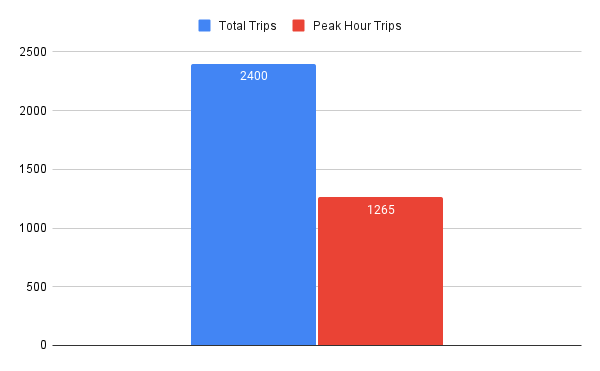

It's been realized that only total of (8) hours along the day represent more than half of the total trips of all day which can be useful in adjusting the resources of the business in these hours in order to maximize the profit. 

#### To find about the most (Top 5) loyal customers

``` SQL
SELECT User_ID, sum(Trip_Fare)as 'Total Spending EGP', count(User_ID) as 'Trips Count', round(count(User_ID)*1.0/(min(Trip_Date)-max(Trip_Date))*1.0,2) as 'Riding freuquency (in days)' 
  FROM Trips
  GROUP BY User_ID
  HAVING COUNT(*) >= 5 -- Assuming the customers are loyal if they traveled 5 trips or more per month 
  order by 2 desc
  limit 5
```  

| User_ID   | Total Spending EGP | Trips Count | Riding freuquency (in days) |
| --------- | ------------------ | ----------- | --------------------------- |
| 127744307 | 2460 | 7 | 3.5 |
| 613388765 | 2018 | 7 | 3.5 |
| 612702050 | 1990 | 7 | 3.5 |
| 134889880 | 1820 | 7 | 3.5 |
| 652298896 | 1802 | 7 | 3.5 |

This shows that: 
* The most loyal customers complete (1) ride every *3.5 days*
* The maximum spending for a customer in one month is *2460 EGP*
* The maximum trips a customer takes per month is *7 trips*

##### To find about the count of all the loyal customers

``` SQL
select count(*) 
from
(SELECT User_ID, count(*) as 'Total Trips'
  FROM Trips
  group by 1
  HAVING COUNT(*) >= 5 -- Assuming the customers are loyal if they traveled 5 trips or more per month 
)subq
```  

This resulted to having *161* loyal customers 

##### To find about the percentage of all the loyal customers

``` SQL
with loyal_customers as(SELECT User_ID as loyal_customer_id, count(*) as 'Total Trips'
  FROM Trips
  group by 1
  HAVING COUNT(*) >= 5 -- Assuming the customers are loyal if they traveled 5 trips or more per month)

select round(count (DISTINCT loyal_customer_id)*100.0/(select count(DISTINCT User_ID) from Trips)*1.0,2) 
                        as 'Loyal Customers Percentage'
FROM loyal_customers
```

This resulted to having loyal customers of *32.59%* of all the customers. This can indicate that the business is attracting new customers. However, the customers' retention can be improved.

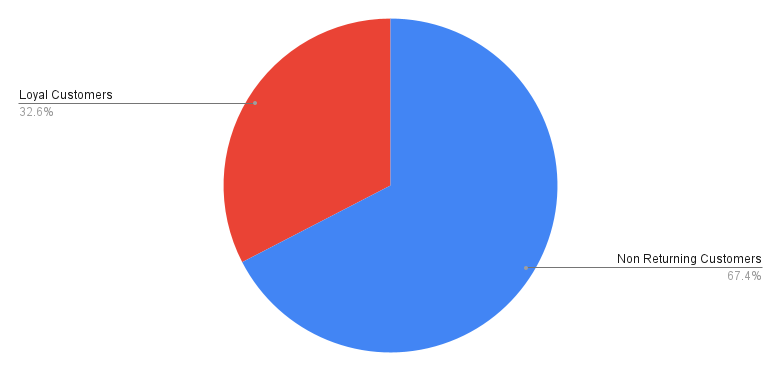

#### Exploring the same routes trips

``` SQL
SELECT Pickup_Location, Dropoff_Location, COUNT(*) AS "Number of Trips"
FROM Trips
GROUP BY Pickup_Location, Dropoff_Location
HAVING COUNT(*) > 1 -- to exclude one-off trips with unique routes
ORDER BY "Number of Trips" DESC;
```

| Pickup Location | Dropoff Location | Number of trips |
| --------------- | ---------------- | --------------- |
| El-Sayeda Zainab | El sabtia | 4 |
| Triumph	|El sabtia	|4
| 77 St.	|Al  Merghani	|3
77 St.	|Al taraeah al bolakya	|3
77 St.	|Cairo airport	|3
77 St.	|Emarat Al Gehaz	|3
Aboud Mazallat	|Al Hadaba Al Olia Al Mokattam	|3
Aboud Mazallat	|Al Hay 6	|3
Aboud Mazallat	|Al Horia Square	|3
Aboud Mazallat	|Tefouli Almaza	|3

#### Exploring the most common dropoff locations

``` SQL
SELECT dropoff_Location, COUNT(*) AS "Number of Trips"
FROM Trips
group by 1
HAVING COUNT(*) > 2 -- to exclude one-off trips with unique routes
ORDER BY "Number of Trips" DESC
limit 10
```

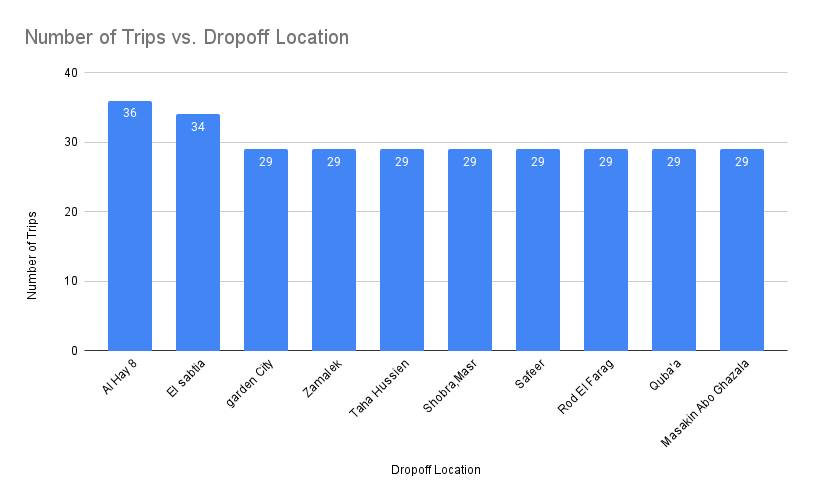

#### Exploring the most common pickup locations

``` SQL
SELECT dropoff_Location, COUNT(*) AS "Number of Trips"
FROM Trips
group by 1
HAVING COUNT(*) > 2 -- to exclude one-off trips with unique routes
ORDER BY "Number of Trips" DESC
limit 10
```

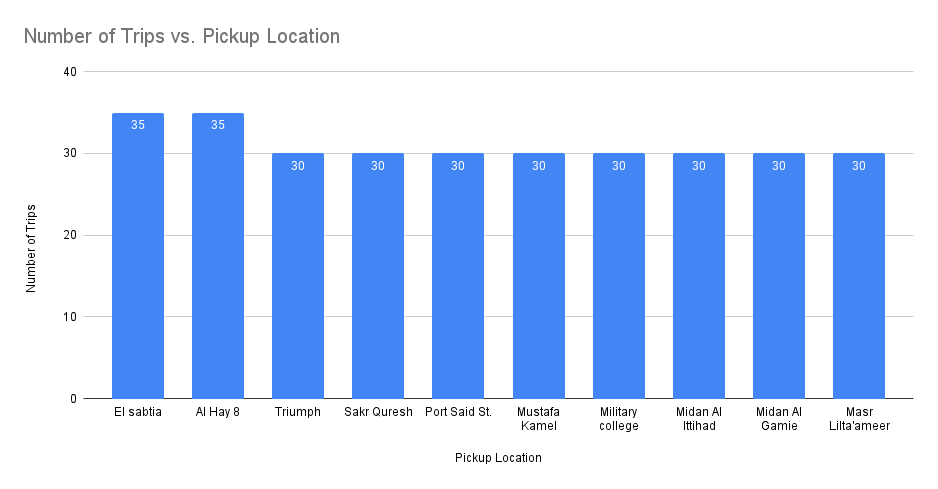